In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [46]:
import os
from google.colab import drive

In [47]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=50, shuffle=True)

In [48]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([50, 1, 28, 28])
torch.Size([50])


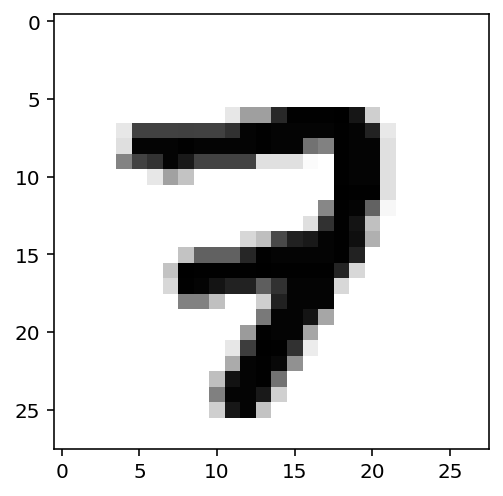

In [49]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

neuron setting

In [50]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [50, 50]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [51]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [52]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


Optimizer

In [53]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)

=======================================================================

In [54]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(50, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0309,  0.0010,  0.0272,  ..., -0.0264, -0.0049, -0.0070],
        [ 0.0213,  0.0273,  0.0188,  ..., -0.0117, -0.0261, -0.0009],
        [ 0.0096, -0.0296, -0.0030,  ...,  0.0174, -0.0257, -0.0165],
        ...,
        [ 0.0243,  0.0071, -0.0128,  ...,  0.0100,  0.0007,  0.0053],
        [-0.0225, -0.0137,  0.0128,  ...,  0.0184, -0.0086, -0.0162],
        [-0.0016, -0.0104,  0.0328,  ...,  0.0228,  0.0316,  0.0205]],
       requires_grad=True)
Gradient - tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0055,  0.0055,  0.0055,  ...,  0.0055,  0.0055,  0.0055],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


UPDATE STEP

In [55]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0299,  0.0020,  0.0282,  ..., -0.0254, -0.0039, -0.0060],
        [ 0.0203,  0.0263,  0.0178,  ..., -0.0127, -0.0271, -0.0019],
        [ 0.0106, -0.0286, -0.0020,  ...,  0.0184, -0.0247, -0.0155],
        ...,
        [ 0.0233,  0.0061, -0.0138,  ...,  0.0090, -0.0003,  0.0043],
        [-0.0235, -0.0147,  0.0118,  ...,  0.0174, -0.0096, -0.0172],
        [-0.0016, -0.0104,  0.0328,  ...,  0.0228,  0.0316,  0.0205]],
       requires_grad=True)


In [56]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
time0 = time()
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.42827514962293206
Epoch 1 - Training loss: 0.2268531425545613
Epoch 2 - Training loss: 0.18183220074201623
Epoch 3 - Training loss: 0.15153620165617515
Epoch 4 - Training loss: 0.13600760251671698
Epoch 5 - Training loss: 0.12233620084550542
Epoch 6 - Training loss: 0.11133588401639524
Epoch 7 - Training loss: 0.10301346393340888
Epoch 8 - Training loss: 0.09907152897988757
Epoch 9 - Training loss: 0.09215873347517724
Epoch 10 - Training loss: 0.0847549067880027
Epoch 11 - Training loss: 0.0821101705522354
Epoch 12 - Training loss: 0.07953169078449719
Epoch 13 - Training loss: 0.07459235121757957
Epoch 14 - Training loss: 0.07214163050589074
Epoch 15 - Training loss: 0.06668581187579548
Epoch 16 - Training loss: 0.06446172173518183
Epoch 17 - Training loss: 0.06257618005052791
Epoch 18 - Training loss: 0.06011647104217748
Epoch 19 - Training loss: 0.0568302913903608

Training Time (in minutes) = 3.847483789920807


In [57]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


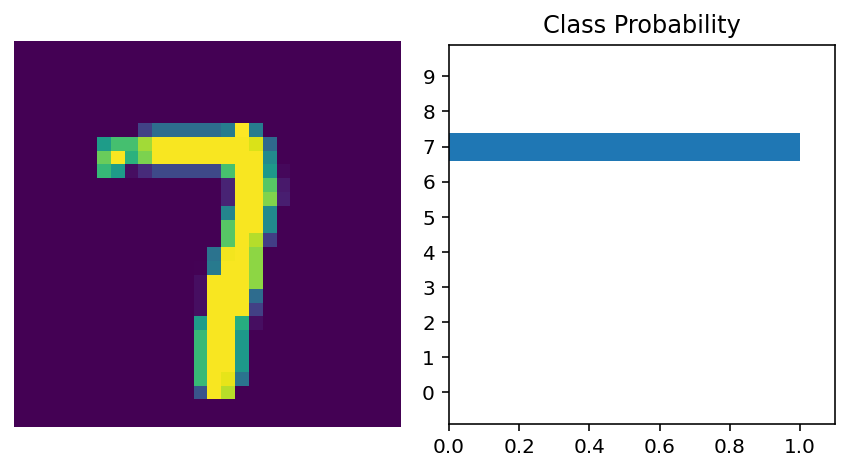

In [58]:
images, labels = next(iter(valloader))

img = images[6].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [59]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9707
